# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом.
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты.
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты:
1. Описание данных *(с расчетом базовых статистик)*,
2. Исследование зависимостей и формулирование гипотез,
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей,
4. Сравнение качества полученных моделей.

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация.
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ)
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
df= pd.read_csv("telecom_users.csv")
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [39]:
df = df.drop(["Unnamed: 0","customerID"],axis=1)


In [40]:
df["TotalCharges"].loc[df["TotalCharges"] == ' ']=0
df["TotalCharges"]= df["TotalCharges"].apply(lambda x : float(x))

C:\Users\leftg\AppData\Local\Temp\ipykernel_17884\90656209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TotalCharges"].loc[df["TotalCharges"] == ' ']=0


In [54]:

cat = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
num = ["tenure",'MonthlyCharges', 'TotalCharges']
targert = "Churn"

<H2>Замена категориальных признаком<H2>

In [42]:
for col in cat:
    replace_from = list(df[col].unique())
    replace_to = list(range(df[col].nunique()))
    df[col] = df[col].replace(replace_from,replace_to, inplace=False)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,72,0,0,0,0,0,0,0,0,0,0,0,0,24.10,1734.65,No
1,1,0,1,1,44,0,1,1,1,1,1,1,1,1,1,1,0,88.15,3973.20,No
2,1,1,0,1,38,0,0,1,1,2,2,1,2,1,1,1,1,74.95,2869.85,Yes
3,0,0,1,1,4,0,1,2,1,2,2,1,2,2,1,1,2,55.90,238.50,No
4,0,0,1,1,2,0,1,2,2,2,1,1,2,1,1,0,2,53.45,119.50,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0,0,0,1,1,0,1,1,2,2,2,1,1,2,1,1,2,95.00,95.00,Yes
5982,1,0,0,0,23,0,0,2,2,1,1,2,1,2,0,1,0,91.10,2198.30,No
5983,0,0,0,0,12,0,1,0,0,0,0,0,0,0,1,1,2,21.15,306.05,No
5984,0,1,1,1,12,0,0,1,1,2,1,1,1,2,1,1,2,99.45,1200.15,Yes


In [43]:
df["Churn"] = df["Churn"].replace(["No",'Yes'],[0,1], inplace=False)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,72,0,0,0,0,0,0,0,0,0,0,0,0,24.10,1734.65,0
1,1,0,1,1,44,0,1,1,1,1,1,1,1,1,1,1,0,88.15,3973.20,0
2,1,1,0,1,38,0,0,1,1,2,2,1,2,1,1,1,1,74.95,2869.85,1
3,0,0,1,1,4,0,1,2,1,2,2,1,2,2,1,1,2,55.90,238.50,0
4,0,0,1,1,2,0,1,2,2,2,1,1,2,1,1,0,2,53.45,119.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0,0,0,1,1,0,1,1,2,2,2,1,1,2,1,1,2,95.00,95.00,1
5982,1,0,0,0,23,0,0,2,2,1,1,2,1,2,0,1,0,91.10,2198.30,0
5983,0,0,0,0,12,0,1,0,0,0,0,0,0,0,1,1,2,21.15,306.05,0
5984,0,1,1,1,12,0,0,1,1,2,1,1,1,2,1,1,2,99.45,1200.15,1


<H2> Основные Данные о таблицах <H2>

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   int64  
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   int64  
 3   Dependents        5986 non-null   int64  
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   int64  
 6   MultipleLines     5986 non-null   int64  
 7   InternetService   5986 non-null   int64  
 8   OnlineSecurity    5986 non-null   int64  
 9   OnlineBackup      5986 non-null   int64  
 10  DeviceProtection  5986 non-null   int64  
 11  TechSupport       5986 non-null   int64  
 12  StreamingTV       5986 non-null   int64  
 13  StreamingMovies   5986 non-null   int64  
 14  Contract          5986 non-null   int64  
 15  PaperlessBilling  5986 non-null   int64  
 16  PaymentMethod     5986 non-null   int64  


In [45]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000
mean,0.490478,0.161377,0.514868,0.700802,32.468760,0.098563,0.672903,1.129803,1.070498,1.219512,1.225359,1.074173,1.183428,1.175075,0.972436,0.589375,1.574841,64.802213,2294.221559,0.265119
std,0.499951,0.367909,0.499821,0.457945,24.516391,0.298100,0.645988,0.737824,0.704947,0.776381,0.778469,0.707174,0.762377,0.758854,0.673207,0.491988,1.066461,30.114702,2274.164124,0.441433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,35.650000,401.587500,0.000000
50%,0.000000,0.000000,1.000000,1.000000,29.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,70.400000,1408.575000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,56.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.900000,3841.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [46]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,72,0,0,0,0,0,0,0,0,0,0,0,0,24.10,1734.65,0
1,1,0,1,1,44,0,1,1,1,1,1,1,1,1,1,1,0,88.15,3973.20,0
2,1,1,0,1,38,0,0,1,1,2,2,1,2,1,1,1,1,74.95,2869.85,1
3,0,0,1,1,4,0,1,2,1,2,2,1,2,2,1,1,2,55.90,238.50,0
4,0,0,1,1,2,0,1,2,2,2,1,1,2,1,1,0,2,53.45,119.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0,0,0,1,1,0,1,1,2,2,2,1,1,2,1,1,2,95.00,95.00,1
5982,1,0,0,0,23,0,0,2,2,1,1,2,1,2,0,1,0,91.10,2198.30,0
5983,0,0,0,0,12,0,1,0,0,0,0,0,0,0,1,1,2,21.15,306.05,0
5984,0,1,1,1,12,0,0,1,1,2,1,1,1,2,1,1,2,99.45,1200.15,1


# 2. Исследование зависимостей и формулирование гипотез

<h2> Корреляция <h2>

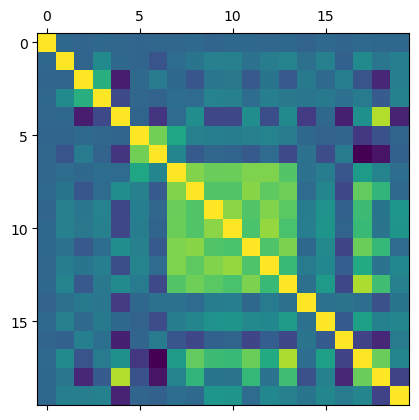

In [47]:
plt.matshow(df.corr())
plt.show()

<Axes: >

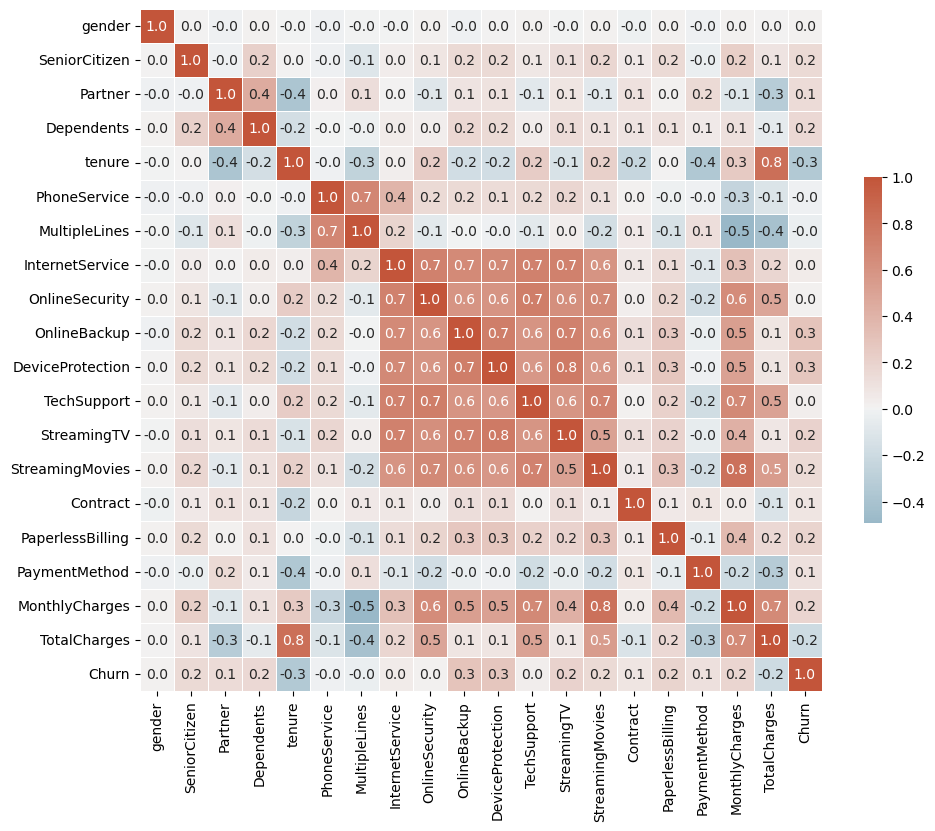

In [48]:
corr = df.corr()
#mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr,  cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True,fmt='.1f' )

<h2> Распределение <h2>

In [49]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

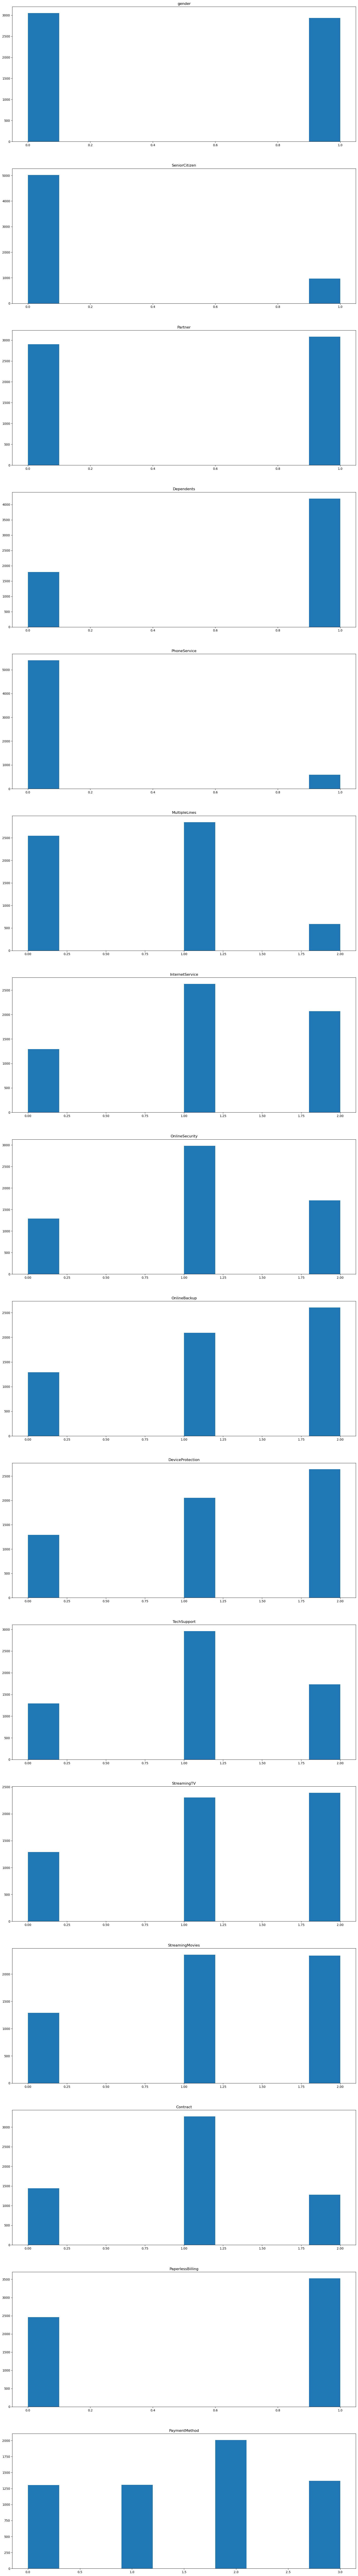

In [50]:
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
numerical = ['tenure','MonthlyCharges', 'TotalCharges']
fig,ax = plt.subplots(nrows= len(categorical), ncols=1,figsize=(20,150))
for i, cat in enumerate(categorical):
    axs=ax[i]
    axs.hist(df[cat])
    axs.set_title(str(cat))


(array([4399.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1587.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

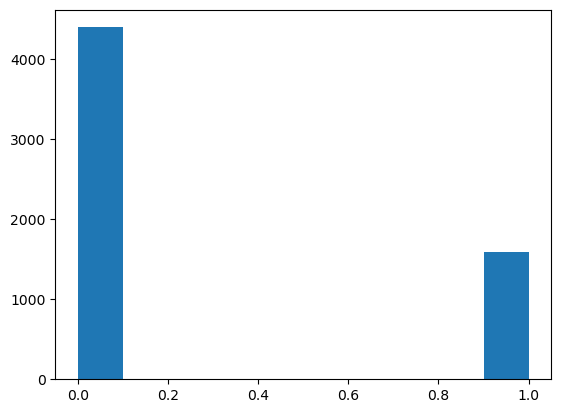

In [15]:
plt.hist(df["Churn"])

Общий процент корреляции с таргетной фичей достаточно низкий.Наибольший процент корреляции с таргентной фичей показали фичи OnlineBackup,DeviceProtection,Tenure. К ним можно добавить менее коррелирующие фичи, такие как SeniorCitizen,Dependents,StreamingTV,PaperlessBilling,'MonthlyCharges', 'TotalCharges'. В некоторых фичах есть перекос 

# 3. Построение моделей для прогнозирования оттока

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

<h2> Предобработка данных <h2>

<h3>два датасета - с 3 основными признаками и с расширенным списком признаков<h3>

In [18]:
df_tr1 = df[["OnlineBackup","DeviceProtection","tenure","Churn"]]

df_tr2 = df[["OnlineBackup","DeviceProtection","tenure","SeniorCitizen","Dependents","StreamingTV","PaperlessBilling",'MonthlyCharges', 'TotalCharges',"Churn"]]

In [19]:
X_train,X_test, y_train,y_test = train_test_split(df_tr1[["OnlineBackup","DeviceProtection","tenure"]],df_tr1["Churn"],stratify=df_tr2["Churn"],random_state=42,test_size=0.2)

<h2> Базовые классификаторы <h2>

<h3>На трех признаках<h3>

In [20]:
lr = LogisticRegression()
SVM = SVC()
DT =  DecisionTreeClassifier()
knn = KNeighborsClassifier()

In [21]:
lr.fit(X_train,y_train)

SVM.fit(X_train,y_train)
DT.fit(X_train,y_train)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [22]:
lr_preds = lr.predict(X_test)
SVM_preds = SVM.predict(X_test)
DT_preds = DT.predict(X_test)
knn_preds = knn.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
lr_preds = lr.predict(X_test)
SVM_preds = SVM.predict(X_test)
DT_preds = DT.predict(X_test)
knn_preds = knn.predict(X_test)
print(accuracy_score(lr_preds,y_test))

print(accuracy_score(SVM_preds,y_test))

print(accuracy_score(DT_preds,y_test))

print(accuracy_score(knn_preds,y_test))

0.7512520868113522
0.7671118530884808
0.7662771285475793
0.7445742904841403


<h3>На расширенных признаках<h3>

In [25]:
X_train1,X_test1, y_train1,y_test1 = train_test_split(df_tr2[["OnlineBackup","DeviceProtection","tenure","SeniorCitizen","Dependents","StreamingTV","PaperlessBilling",'MonthlyCharges', 'TotalCharges']],df_tr2["Churn"],stratify=df_tr2["Churn"],random_state=42,test_size=0.2)

In [26]:
ct = ColumnTransformer([
        ('somename', StandardScaler(), ["tenure","MonthlyCharges","TotalCharges"])
    ], remainder='passthrough')
X_train = ct.fit_transform(X_train1)
X_test = ct.fit_transform(X_test1)

In [27]:
lr.fit(X_train1,y_train1)

SVM.fit(X_train1,y_train1)
DT.fit(X_train1,y_train1)
knn.fit(X_train1,y_train1)

C:\Users\leftg\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier()

In [28]:
lr_preds = lr.predict(X_test1)
SVM_preds = SVM.predict(X_test1)
DT_preds = DT.predict(X_test1)
knn_preds = knn.predict(X_test1)
print(accuracy_score(lr_preds,y_test1))

print(accuracy_score(SVM_preds,y_test1))

print(accuracy_score(DT_preds,y_test1))

print(accuracy_score(knn_preds,y_test1))

0.7813021702838063
0.7345575959933222
0.7128547579298832
0.7696160267111853


Лучше всего себя показала Логистическая регрессия, с ней дальше и будем работать

<h3>Грид-серч лучшей модели<h3>

In [70]:
from sklearn.model_selection import GridSearchCV 
param_grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}  
 
grid = GridSearchCV(LogisticRegression(), param_grid, verbose = 3)

grid.fit(X_train1, y_train1) 

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ...............C=0.001, penalty=l2;, score=0.785 total time=   0.0s
[CV 2/5] END ...............C=0.001, penalty=l2;, score=0.765 total time=   0.0s


C:\Users\leftg\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\leftg\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 3/5] END ...............C=0.001, penalty=l2;, score=0.795 total time=   0.0s
[CV 4/5] END ...............C=0.001, penalty=l2;, score=0.785 total time=   0.0s
[CV 5/5] END ...............C=0.001, penalty=l2;, score=0.791 total time=   0.0s
[CV 1/5] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ................C=0.01, penalty=l2;, score=0.789 total time=   0.0s


C:\Users\leftg\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\leftg\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 2/5] END ................C=0.01, penalty=l2;, score=0.772 total time=   0.0s
[CV 3/5] END ................C=0.01, penalty=l2;, score=0.796 total time=   0.0s
[CV 4/5] END ................C=0.01, penalty=l2;, score=0.791 total time=   0.0s
[CV 5/5] END ................C=0.01, penalty=l2;, score=0.793 total time=   0.0s
[CV 1/5] END ...................C=0.1, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ...................C=0.1, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ...................C=0.1, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ...................C=0.1, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ...................C=0.1, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END .................C=0.1, penalty=l2;, score=0.788 total time=   0.0s
[CV 2/5] END .................C=0.1, penalty=l2;, score=0.782 total time=   0.0s
[CV 3/5] END .................C=0.1, penalty=l2;, score=0.795 total time=   0.0s
[CV 4/5] END ...............

C:\Users\leftg\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\leftg\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 1/5] END .................C=1.0, penalty=l2;, score=0.785 total time=   0.0s
[CV 2/5] END .................C=1.0, penalty=l2;, score=0.778 total time=   0.0s
[CV 3/5] END .................C=1.0, penalty=l2;, score=0.792 total time=   0.0s


C:\Users\leftg\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\leftg\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 4/5] END .................C=1.0, penalty=l2;, score=0.792 total time=   0.0s
[CV 5/5] END .................C=1.0, penalty=l2;, score=0.781 total time=   0.0s
[CV 1/5] END ..................C=10.0, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ..................C=10.0, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ..................C=10.0, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ..................C=10.0, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ..................C=10.0, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ................C=10.0, penalty=l2;, score=0.785 total time=   0.0s
[CV 2/5] END ................C=10.0, penalty=l2;, score=0.778 total time=   0.0s
[CV 3/5] END ................C=10.0, penalty=l2;, score=0.792 total time=   0.0s
[CV 4/5] END ................C=10.0, penalty=l2;, score=0.795 total time=   0.0s
[CV 5/5] END ................C=10.0, penalty=l2;, score=0.795 total time=   0.0s
[CV 1/5] END ...............

C:\Users\leftg\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\leftg\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 3/5] END ...............C=100.0, penalty=l2;, score=0.790 total time=   0.0s
[CV 4/5] END ...............C=100.0, penalty=l2;, score=0.793 total time=   0.0s
[CV 5/5] END ...............C=100.0, penalty=l2;, score=0.795 total time=   0.0s
[CV 1/5] END ................C=1000.0, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ................C=1000.0, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ................C=1000.0, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ................C=1000.0, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ................C=1000.0, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ..............C=1000.0, penalty=l2;, score=0.782 total time=   0.0s


C:\Users\leftg\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\leftg\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 2/5] END ..............C=1000.0, penalty=l2;, score=0.776 total time=   0.0s
[CV 3/5] END ..............C=1000.0, penalty=l2;, score=0.791 total time=   0.0s
[CV 4/5] END ..............C=1000.0, penalty=l2;, score=0.793 total time=   0.0s
[CV 5/5] END ..............C=1000.0, penalty=l2;, score=0.795 total time=   0.0s


C:\Users\leftg\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\leftg\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [29]:

LR_best = LogisticRegression(C= 0.1, penalty="l2")

LR_best.fit(X_train1,y_train1)

C:\Users\leftg\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [30]:

preds_best_lr=LR_best.predict(X_test1)
accuracy_score(preds_best_lr,y_test1)

0.7829716193656093

<h3>Градиентный бустинг<h3>

In [39]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train1, label=y_train1)
dtest = xgb.DMatrix(X_test1, label=y_test1)

In [40]:
param = {
   'max_depth': 3,
   'eta': 0.3, 
   'silent': 1, 
   'objective': 'multi:softprob',
   'num_class': 3}
num_round = 20

In [41]:
bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)

C:\Users\leftg\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [19:09:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


In [42]:
preds

array([[0.27729863, 0.7125107 , 0.01019072],
       [0.41395453, 0.5741241 , 0.01192141],
       [0.9532082 , 0.04241811, 0.00437368],
       ...,
       [0.9364836 , 0.05852682, 0.00498964],
       [0.8411699 , 0.15199615, 0.0068339 ],
       [0.19236003, 0.7990019 , 0.00863809]], dtype=float32)

In [43]:
best_preds = np.asarray([np.argmax(line) for line in preds])
accuracy_score(best_preds ,y_test1)

0.7938230383973289

In [44]:

data= df[["OnlineBackup","DeviceProtection","tenure","SeniorCitizen","Dependents","StreamingTV","PaperlessBilling",'MonthlyCharges', 'TotalCharges']]
target = df["Churn"]
ct = ColumnTransformer([
        ('somename', StandardScaler(), ["tenure","MonthlyCharges","TotalCharges"])
    ], remainder='passthrough')
data_tr = ct.fit_transform(data)

In [45]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
folds = 3
param_comb = 5
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1,scale_pos_weight=])
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=4, cv=skf.split(data_tr,target), verbose=3, random_state=1001 )


In [46]:
random_search.fit(data_tr, target)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\leftg\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [19:09:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x00000211BC442C20>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=600, n_jobs=None,
                                           nthread=1, num_parallel_tree=None, ...),
                   n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=1001, scoring='accuracy', verbose=3)

<h3>Случайные деревья<h3>

In [47]:
from sklearn.ensemble import RandomForestClassifier
rnd= RandomForestClassifier()
rnd.fit(X_train1,y_train1)


RandomForestClassifier()

In [48]:
rnd_preds = rnd.predict(X_test1)

accuracy_score(rnd_preds,y_test1)

0.7679465776293823

In [49]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [50]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=3, random_state=42, n_jobs = -1)

In [52]:
rf_random.fit(X_train1,y_train1)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\leftg\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\leftg\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\leftg\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\leftg\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\leftg\anaconda3\Lib\site-packages\s

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=3)

In [53]:
rf_random.best_params_


{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [54]:
{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [55]:
rnd_preds = rf_random.predict(X_test1)

accuracy_score(rnd_preds,y_test1)

0.7954924874791319

<h3>На полном наборе<h3>

In [56]:
X_train2,X_test2, y_train2,y_test2 = train_test_split(df.drop("Churn",axis=1),df["Churn"],stratify=df_tr2["Churn"],random_state=42,test_size=0.2)

In [82]:
from sklearn.model_selection import GridSearchCV 
param_grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}  
 
grid = GridSearchCV(LogisticRegression(), param_grid, verbose = 3,scoring='roc_auc')

ct = ColumnTransformer([
        ('somename', StandardScaler(), ["tenure","MonthlyCharges","TotalCharges"])
    ], remainder='passthrough')
X_train3 = ct.fit_transform(X_train2)
X_test3 = ct.fit_transform(X_test2)
grid.fit(X_train3, y_train2) 

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ...............C=0.001, penalty=l2;, score=0.799 total time=   0.0s
[CV 2/5] END ...............C=0.001, penalty=l2;, score=0.771 total time=   0.0s
[CV 3/5] END ...............C=0.001, penalty=l2;, score=0.825 total time=   0.0s
[CV 4/5] END ...............C=0.001, penalty=l2;, score=0.837 total time=   0.0s
[CV 5/5] END ...............C=0.001, penalty=l2;, score=0.835 total time=   0.0s
[CV 1/5] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ..................C=0.01, penalty=l

C:\Users\leftg\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\leftg\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\leftg\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\leftg\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=3)

In [84]:
LR_full = LogisticRegression(C=100,penalty="l2")
LR_full.fit(X_train3,y_train2)

LogisticRegression(C=100)

In [134]:
full_lr_preds = LR_full.predict(X_test3)

accuracy_score(full_lr_preds,y_test2)


0.7929883138564274

In [88]:
data1= df.drop("Churn",axis=1)
target1 = df["Churn"]
ct = ColumnTransformer([
        ('somename', StandardScaler(), ["tenure","MonthlyCharges","TotalCharges"])
    ], remainder='passthrough')
data_tr1 = ct.fit_transform(data1)

In [101]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
folds = 3
param_comb = 5
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search1 = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=4, cv=skf.split(data_tr1,target1), verbose=3, random_state=1001 )

In [102]:
random_search1.fit(data_tr1, target1)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\leftg\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [19:51:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x00000211C8A74280>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=600, n_jobs=None,
                                           nthread=1, num_parallel_tree=None, ...),
                   n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=1001, scoring='accuracy', verbose=3)

In [103]:
xgb_full_preds = random_search1.predict(X_test3)

In [95]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [96]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=3, random_state=42, n_jobs = -1,scoring='accuracy')

In [97]:
rf_random.fit(X_train3,y_train2)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\leftg\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\leftg\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\leftg\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\leftg\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\leftg\anaconda3\Lib\site-packages\

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='roc_auc', verbose=3)

In [98]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [99]:
rf_full_preds = rf_random.predict(X_test3)
accuracy_score(rf_full_preds,y_test2)

0.7929883138564274

In [100]:
roc_auc_score(rf_full_preds,y_test2)

0.7378435977731386

<h2> Анасамбль Простых Классификаторов <h2>

In [118]:
from sklearn.ensemble import VotingClassifier

In [119]:
clf1= LogisticRegression()
clf2 = SVC()
clf3 = KNeighborsClassifier()
clf4 = DecisionTreeClassifier()

In [120]:
vote_hard = VotingClassifier(estimators=[
        ('lr', clf1), ('SCM', clf2), ('knn', clf3),("DT", clf4)], voting='hard')
vote_hard.fit(X_train3,y_train2)

VotingClassifier(estimators=[('lr', LogisticRegression()), ('SCM', SVC()),
                             ('knn', KNeighborsClassifier()),
                             ('DT', DecisionTreeClassifier())])

In [122]:
vote_hard_preds = vote_hard.predict(X_test3)
accuracy_score(vote_hard_preds,y_test2)

0.7888146911519198

In [127]:
clf1= LogisticRegression()
clf2 = SVC(probability=True)
clf3 = KNeighborsClassifier()
clf4 = DecisionTreeClassifier()
vote_soft = VotingClassifier(estimators=[
        ('lr', clf1), ('SCM', clf2), ('knn', clf3),("DT", clf4)], voting='soft')
vote_soft.fit(X_train3,y_train2)
vote_soft_preds = vote_soft.predict(X_test3)
accuracy_score(vote_soft_preds,y_test2)

0.7804674457429048

<h2> Анасамбль Преобученных <h2>

In [129]:
from mlxtend.classifier import EnsembleVoteClassifier
import copy
eclf = EnsembleVoteClassifier(clfs=[LR_full, rf_random, random_search1], weights=[1,1,1], fit_base_estimators=False)

In [132]:
eclf.fit(X_train3,y_train2)
eclf_preds = eclf.predict(X_test3)

C:\Users\leftg\anaconda3\Lib\site-packages\mlxtend\classifier\ensemble_vote.py:172: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn(


In [133]:
accuracy_score(eclf_preds,y_test2)

0.8038397328881469

Модели на полном наборе показали себя лучше, видимо даже слабая корреляция признаков дает свой вклад

<h2>OneHotEncoded<h2>

In [53]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,72,0,0,0,0,0,0,0,0,0,0,0,0,24.10,1734.65,0
1,1,0,1,1,44,0,1,1,1,1,1,1,1,1,1,1,0,88.15,3973.20,0
2,1,1,0,1,38,0,0,1,1,2,2,1,2,1,1,1,1,74.95,2869.85,1
3,0,0,1,1,4,0,1,2,1,2,2,1,2,2,1,1,2,55.90,238.50,0
4,0,0,1,1,2,0,1,2,2,2,1,1,2,1,1,0,2,53.45,119.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0,0,0,1,1,0,1,1,2,2,2,1,1,2,1,1,2,95.00,95.00,1
5982,1,0,0,0,23,0,0,2,2,1,1,2,1,2,0,1,0,91.10,2198.30,0
5983,0,0,0,0,12,0,1,0,0,0,0,0,0,0,1,1,2,21.15,306.05,0
5984,0,1,1,1,12,0,0,1,1,2,1,1,1,2,1,1,2,99.45,1200.15,1


In [57]:
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer([
        ('onehot',OneHotEncoder(),cat),
        ('scaler', StandardScaler(), num)
    ], remainder='passthrough')
df_tr = ct.fit_transform(df.drop("Churn",axis=1))


In [58]:
df_tr

array([[ 1.        ,  0.        ,  1.        , ...,  1.61257595,
        -1.35168577, -0.24607648],
       [ 0.        ,  1.        ,  1.        , ...,  0.47038747,
         0.77536006,  0.73834544],
       [ 0.        ,  1.        ,  0.        , ...,  0.22563279,
         0.33699933,  0.25313764],
       ...,
       [ 1.        ,  0.        ,  1.        , ..., -0.8349708 ,
        -1.44965275, -0.87431581],
       [ 1.        ,  0.        ,  0.        , ..., -0.8349708 ,
         1.15062342, -0.48112752],
       [ 1.        ,  0.        ,  1.        , ..., -0.26387656,
        -1.4944851 , -0.8078023 ]])

In [59]:
X_train, X_test,y_train,y_test = train_test_split(df_tr,df["Churn"],test_size=0.2,stratify=df["Churn"])

In [63]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
folds = 3
param_comb = 5
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search_1hot = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=10, cv=skf.split(df_tr,df["Churn"]), verbose=3, random_state=1001 )

In [64]:
random_search_1hot.fit(df_tr,df["Churn"])

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\leftg\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [19:38:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x0000021EBA3D6200>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=600, n_jobs=None,
                                           nthread=1, num_parallel_tree=None, ...),
                   n_iter=5, n_jobs=10,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=1001, scoring='accuracy', verbose=3)

In [66]:
random_search_1hot.best_params_

{'subsample': 1.0,
 'min_child_weight': 5,
 'max_depth': 3,
 'gamma': 5,
 'colsample_bytree': 1.0}

In [67]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1,**random_search1.best_params_)

In [68]:
xgb.fit(X_train,y_train)

C:\Users\leftg\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [19:41:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None, nthread=1,
              num_parallel_tree=None, ...)

In [72]:
preds = xgb.predict(X_test)
accuracy_score(preds,y_test)
roc_auc_score(preds,y_test)

0.7369325375293905

# 4. Сравнение качества моделей

In [71]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

In [74]:
from sklearn.metrics import classification_report

In [75]:
print("Классификатор "+"lr")
print(classification_report(full_lr_preds ,y_test2))
print("\n")

print("Классификатор "+"XGB")
print(classification_report(xgb_full_preds,y_test2))
print("\n")

print("Классификатор "+"RND")
print(classification_report(rf_full_preds,y_test2))
print("\n")


Классификатор lr
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       960
           1       0.47      0.63      0.54       238

    accuracy                           0.79      1198
   macro avg       0.69      0.73      0.70      1198
weighted avg       0.81      0.79      0.80      1198



Классификатор XGB
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       958
           1       0.53      0.71      0.61       240

    accuracy                           0.82      1198
   macro avg       0.73      0.78      0.75      1198
weighted avg       0.84      0.82      0.83      1198



Классификатор RND
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       960
           1       0.49      0.65      0.56       238

    accuracy                           0.79      1198
   macro avg       0.70      0.74      0.71      1198
weighted avg     

In [76]:
print("Классификатор "+"lr")
print(f1_score(full_lr_preds ,y_test2))
print("\n")

print("Классификатор "+"XGB")
print(f1_score(xgb_full_preds,y_test2))
print("\n")

print("Классификатор "+"RND")
print(f1_score(rnd_preds,y_test2))
print("\n")

Классификатор lr
0.539568345323741


Классификатор XGB
0.6093189964157707


Классификатор RND
0.5488029465930019




In [77]:
print("Классификатор "+"lr")
print(accuracy_score(full_lr_preds ,y_test2))
print("\n")


print("Классификатор "+"XGB")
print(accuracy_score(xgb_full_preds,y_test2))
print("\n")

print("Классификатор "+"RND")
print(accuracy_score(rf_full_preds,y_test2))
print("\n")

Классификатор lr
0.7863105175292153


Классификатор XGB
0.8180300500834724


Классификатор RND
0.7946577629382304




In [78]:
print("Классификатор "+"lr")
print(precision_score(full_lr_preds ,y_test2))
print("\n")
 
print("Классификатор "+"XGB")
print(precision_score(xgb_full_preds,y_test2))
print("\n")

print("Классификатор "+"RND")
print(precision_score(rf_full_preds,y_test2))
print("\n")

Классификатор lr
0.4716981132075472


Классификатор XGB
0.5345911949685535


Классификатор RND
0.48742138364779874




In [79]:
print("Классификатор "+"lr")
print(recall_score(full_lr_preds,y_test1))
print("\n")
 
print("Классификатор "+"XGB")
print(recall_score(xgb_full_preds,y_test1))
print("\n")

print("Классификатор "+"RND")
print(recall_score(rf_full_preds,y_test2))
print("\n")

Классификатор lr
0.6302521008403361


Классификатор XGB
0.7083333333333334


Классификатор RND
0.6512605042016807




In [81]:
print("Классификатор "+"lr")
print(roc_auc_score(full_lr_preds,y_test1))
print("\n")
 
print("Классификатор "+"XGB")
print(roc_auc_score(xgb_full_preds,y_test1))
print("\n")

print("Классификатор "+"RND")
print(roc_auc_score(rf_full_preds,y_test2))
print("\n")

Классификатор lr
0.727626050420168


Классификатор XGB
0.7769224077940153


Классификатор RND
0.740734418767507




Вывод: Лучшие результаты показала модель XGB, используящая полный список фичей. Если требуется более компактная модель, стоит использовать меньшее количество признаков, уменьшение качества модели не значительна